In [1]:
%load_ext autoreload
%autoreload 2

import torch

from text3d2video.rendering import render_depth_map
torch.set_grad_enabled(False)

In [5]:
import numpy as np
from text3d2video.util import read_obj_with_uvs
from text3d2video.utilities.camera_placement import (
    cam_view_prompt,
    turntable_extrinsics,
)
from pytorch3d.renderer import FoVPerspectiveCameras

# read mesh
device = "cuda"
mesh_path = "data/meshes/mixamo-human.obj"
mesh, verts_uvs, faces_uvs = read_obj_with_uvs(mesh_path, device=device)

# setup cams
n_frames = 10
dist = 6.5
angles = np.linspace(0, 360, n_frames, endpoint=False)
R, T = turntable_extrinsics(dists=dist, angles=angles)
frame_cams = FoVPerspectiveCameras(R=R, T=T, device="cuda", fov=10)
frame_meshes = mesh.extend(len(frame_cams))

# prompt suffixes
prompt_suffixes = [f", {cam_view_prompt(a, 0)} view" for a in angles]

  warnings.warn("No mtl file provided")



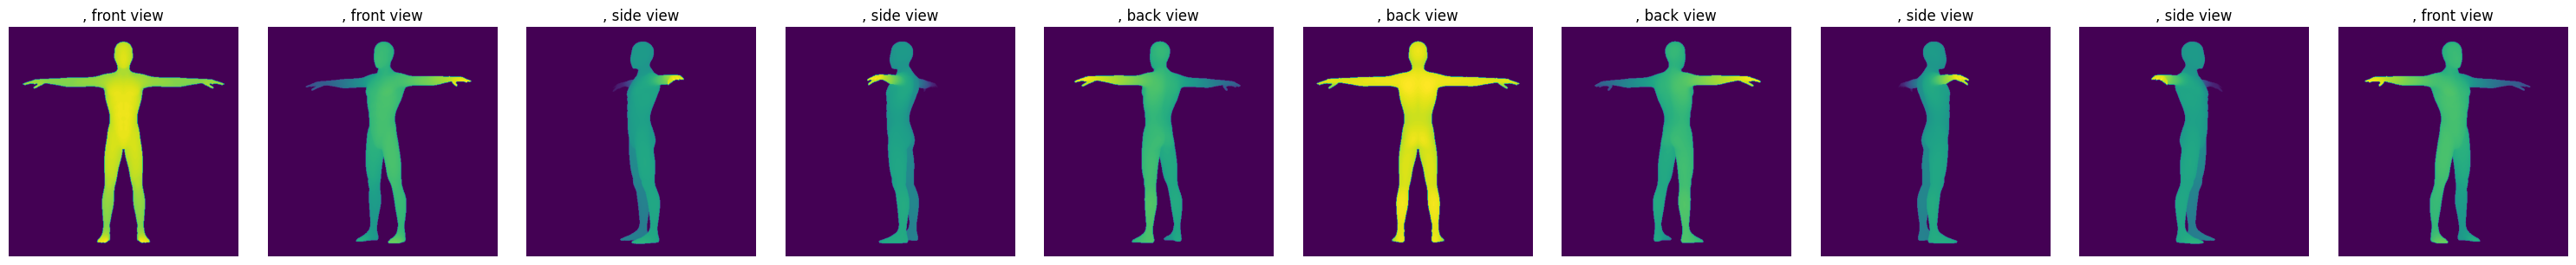

In [7]:
from text3d2video.utilities.ipython_utils import display_ims

depths = render_depth_map(frame_meshes, frame_cams)
display_ims(depths, titles=prompt_suffixes)

In [9]:
from text3d2video.artifacts.anim_artifact import AnimationArtifact

name = 'human_mv'

anim = AnimationArtifact.create_empty_artifact(name)
anim.write_frames(frame_cams, frame_meshes)
anim.write_uv_data(verts_uvs, faces_uvs)
anim.log_standalone()

wandb: Adding directory to artifact (/tmp/local_artifacts/animation/human_mv)... Done. 0.0s
